#     Plot latitude profile comparisons of aircraft and model data, and compare both with binned data


## Setup imports

In [1]:
import matplotlib.pyplot as plt

import notebook_prepare as pre

## Define plotting function

In [2]:
def plot_latitude_profile(full_df,df,plotdir,key,label,a_colour,m_colour,lat_bin,avg_method,min_method,max_method,model) :

    """
    Plot latitude profile comparisons of aircraft and model data.
    """

    # Define the figure.
    fig,ax = pre.setup_figure()

    # Define the data.
    lat_data = df['Latitude']
    data = pre.read_data_values(df, model)

    # Plot the data.
    plt.scatter(lat_data,data['a_avg'],s=200,c=a_colour,label='Aircraft')
    
    if(model):
        plt.scatter(lat_data,data['m_avg'],s=200,c=m_colour,label='Model')     
        # Add a legend.
        plt.legend(fontsize=30,markerscale=2)

    # Set the axes labels.
    plt.xlabel('Latitude / degrees north',fontsize=50,labelpad=10)
    plt.ylabel(label,fontsize=50,labelpad=10)

    # Set the axes ticks.
    ax.tick_params(labelsize=30)

    plt.show()
    # Save the figure.
    #plt.savefig(plotdir+key+'_Latitude_Profile.png')
    #plt.close()

    """
    Plot latitude profile comparisons of aircraft and model data with binned data.
    """

    # Define the figure.
    fig,ax = pre.setup_figure()

    # Define the data.
    data = pre.bin_latitude_data(full_df,avg_method,min_method,max_method,lat_bin, model)

    # Plot the data.
    plt.plot(data['binned'],data['a_avg'],lw=5,c=a_colour,label='Aircraft')
    plt.fill_between(data['binned'],data['a_min'],data['a_max'],fc=a_colour,ec=None,alpha=0.5)
    
    if(model):
        plt.plot(data['binned'],data['m_avg'],lw=5,c=m_colour,label='Model')
        plt.fill_between(data['binned'],data['m_min'],data['m_max'],fc=m_colour,ec=None,alpha=0.5)
        # Add a legend.
        plt.legend(fontsize=30,markerscale=2)

    # Set the axes labels.
    plt.xlabel('Latitude / degrees north',fontsize=50,labelpad=10)
    plt.ylabel(label,fontsize=50,labelpad=10)

    # Set the axes ticks.
    ax.tick_params(labelsize=30)

    plt.show()
    # Save the figure.
    #plt.savefig(plotdir+key+'_Latitude_Profile_Binned.png')
    #plt.close()

## Specify the flight number & model data

In [3]:
# Set the flight number.
# Current valid options are M270, M296 and M302.
flight_number = 'M270'  

# Specify whether you have model data to plot.
model = True

## Prepare the data and plot for each pollution species

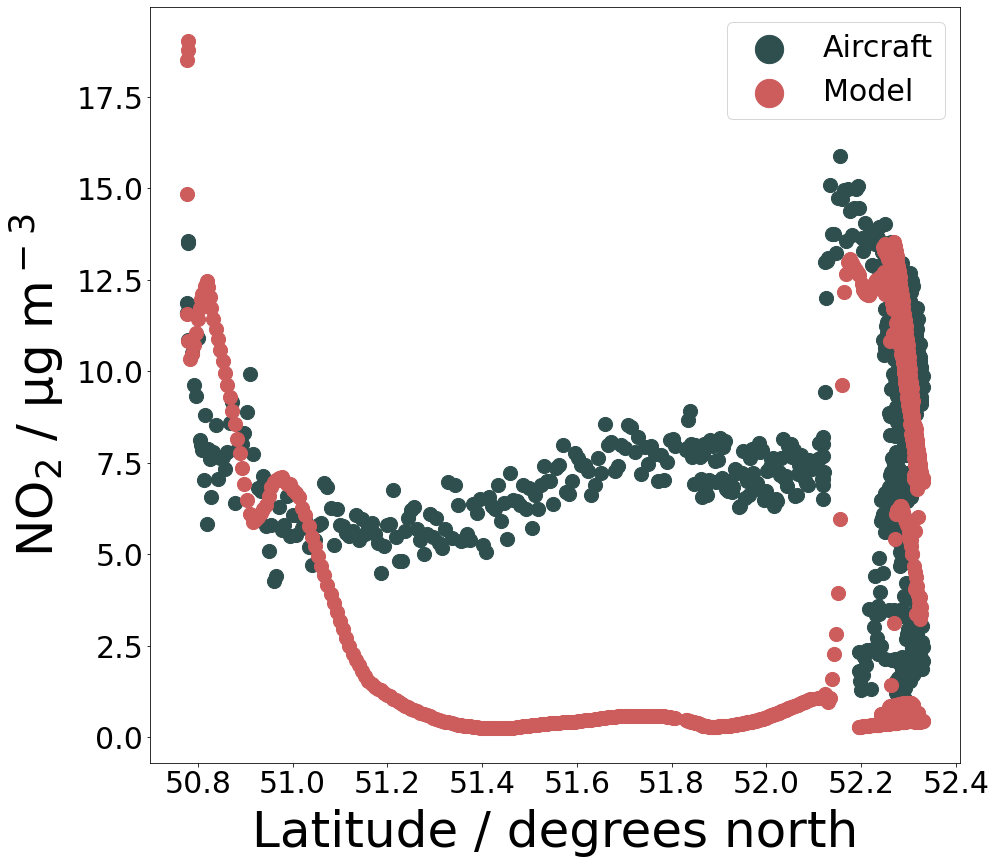

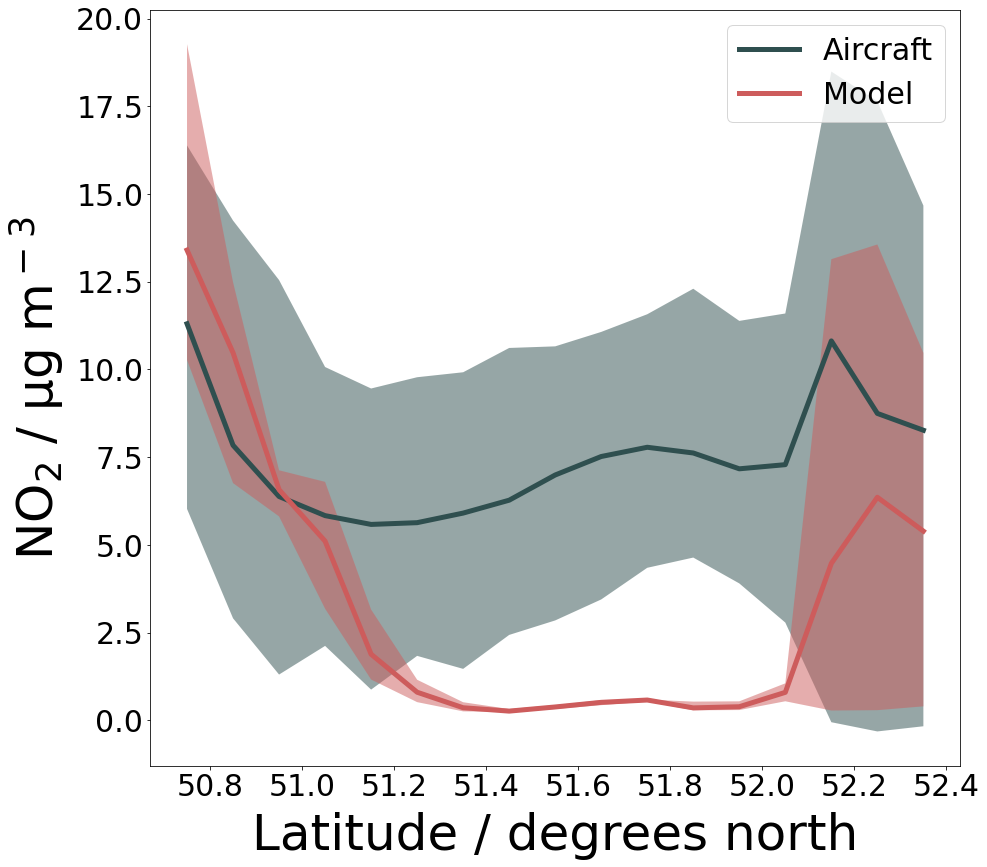

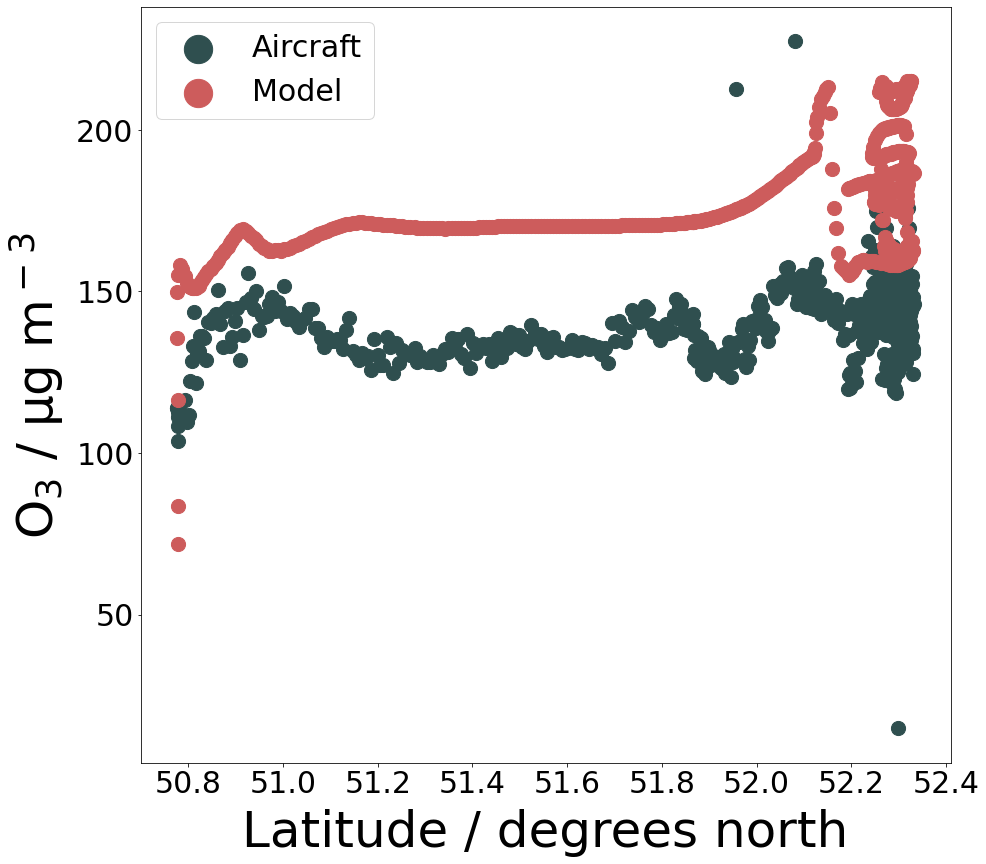

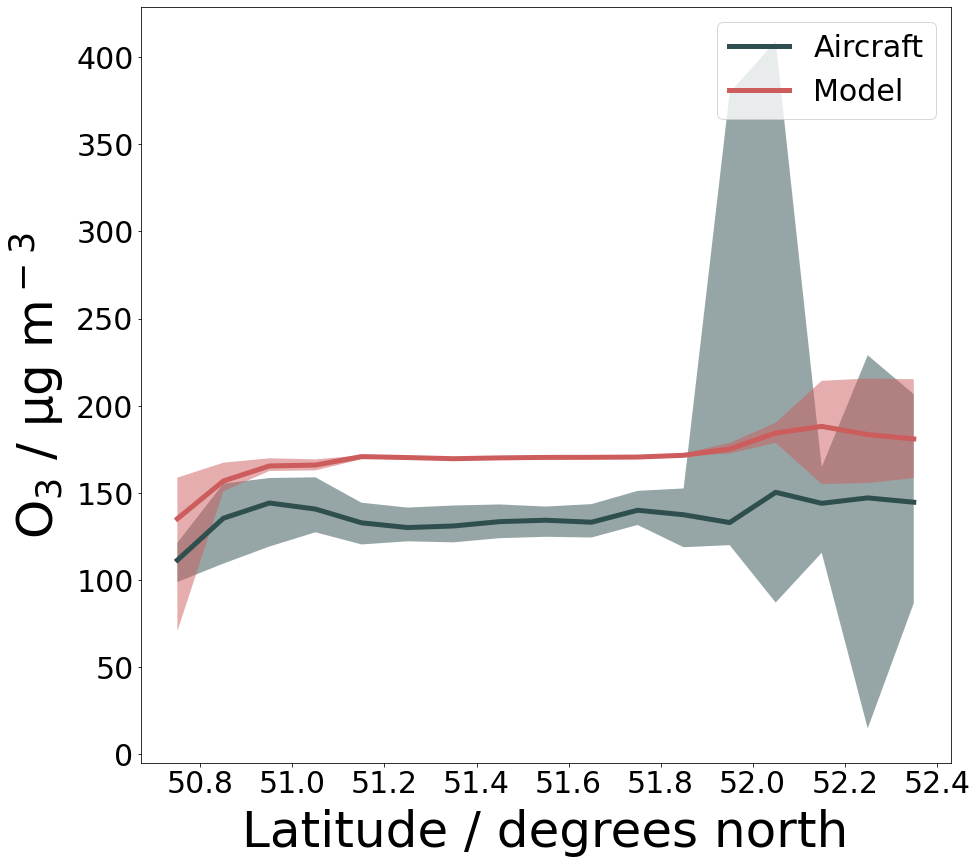

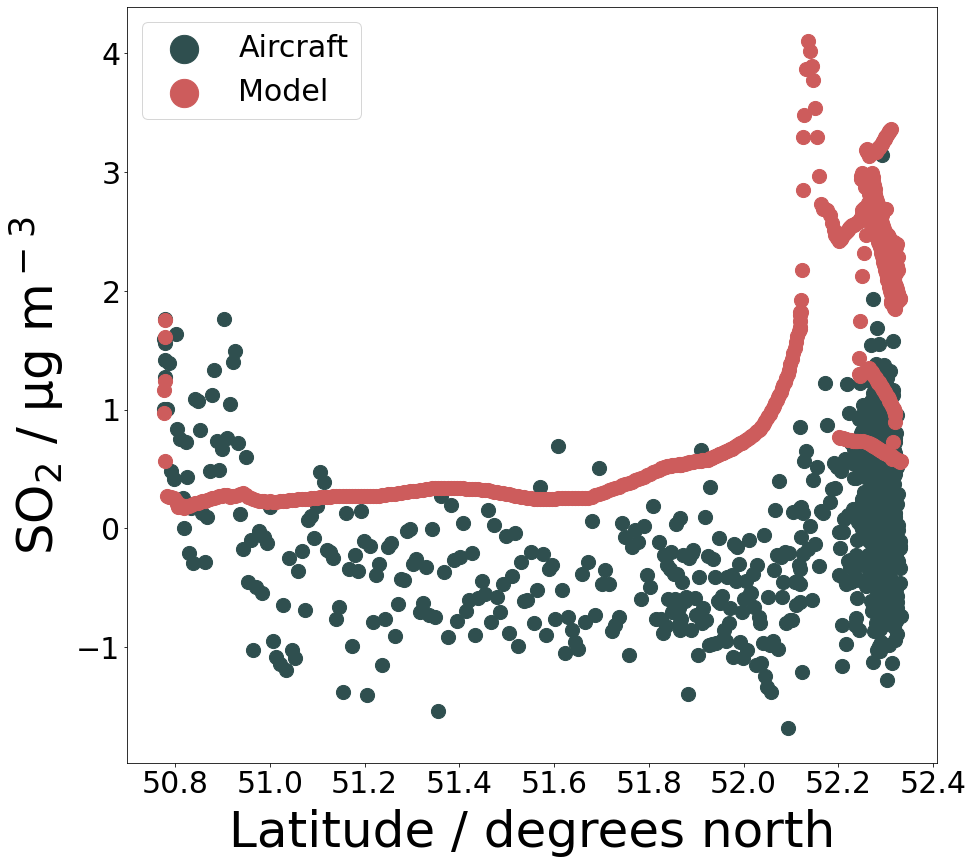

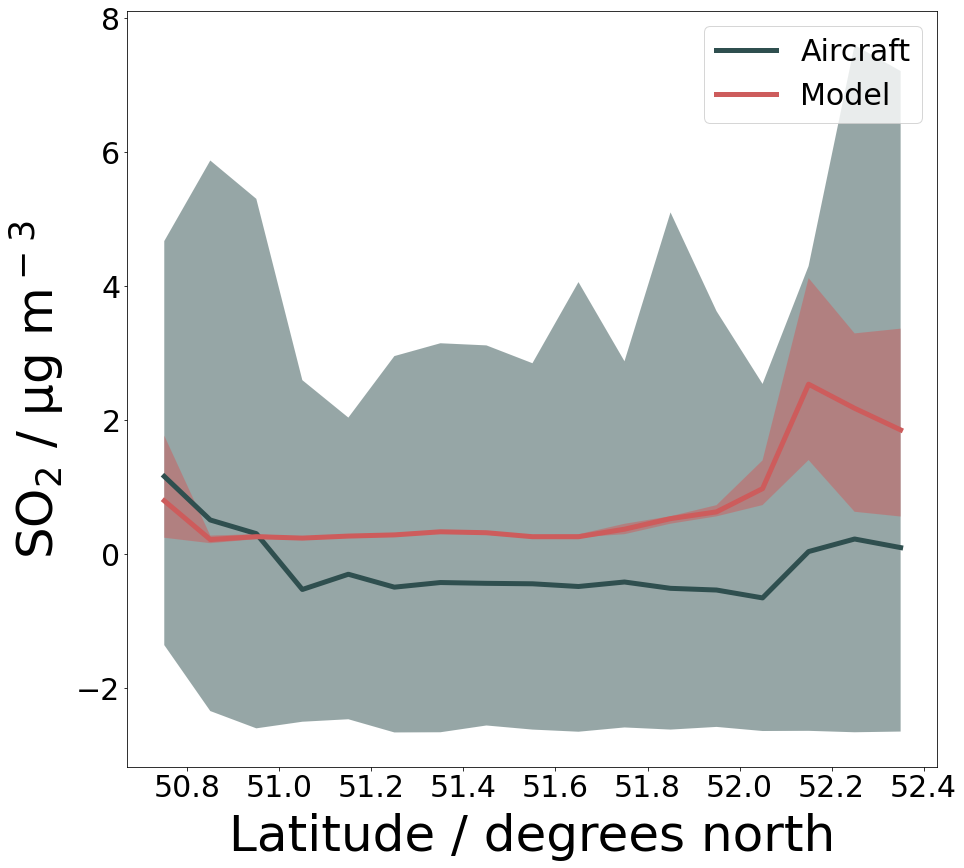

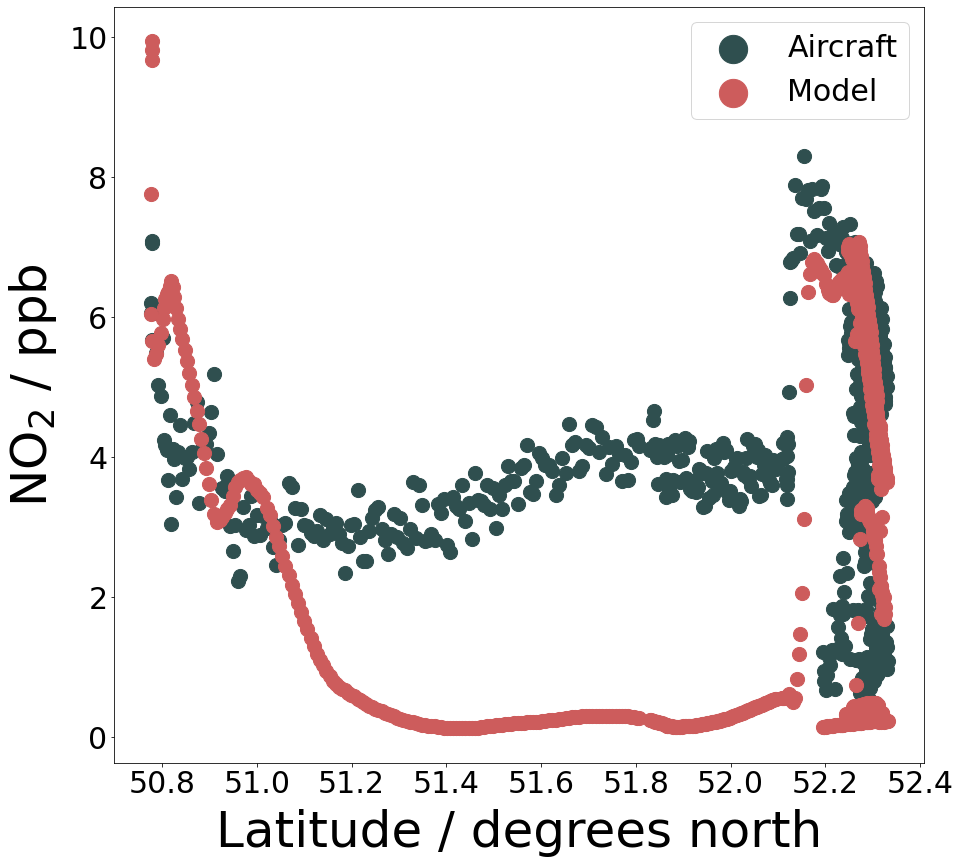

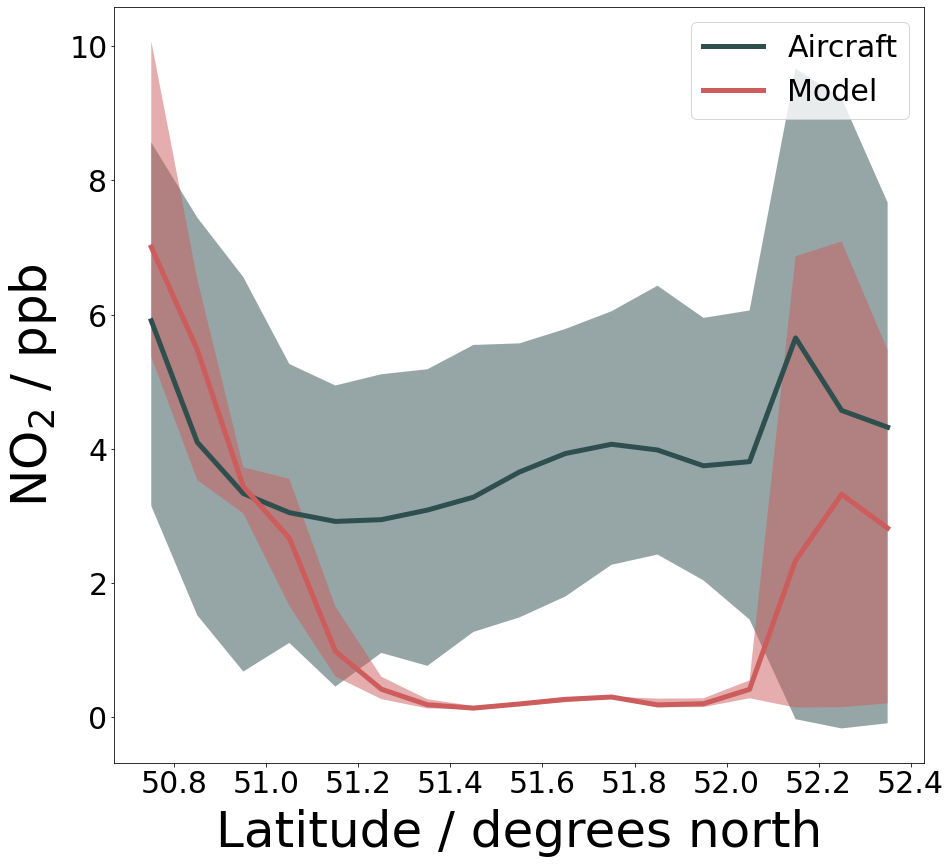

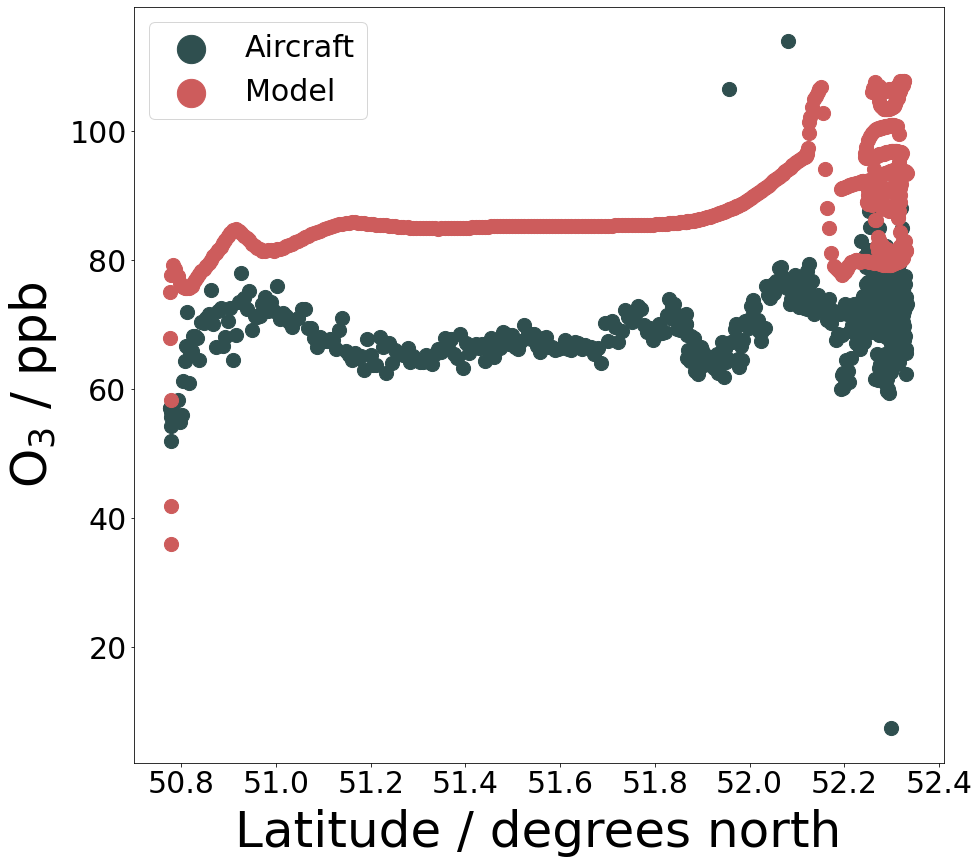

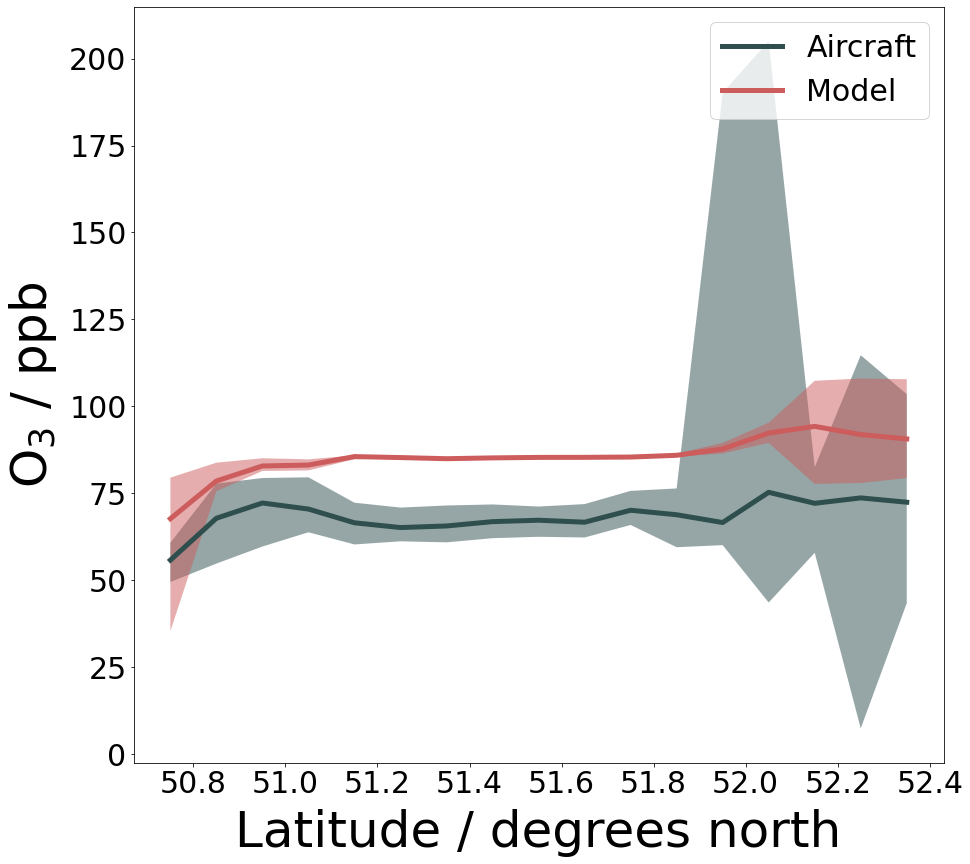

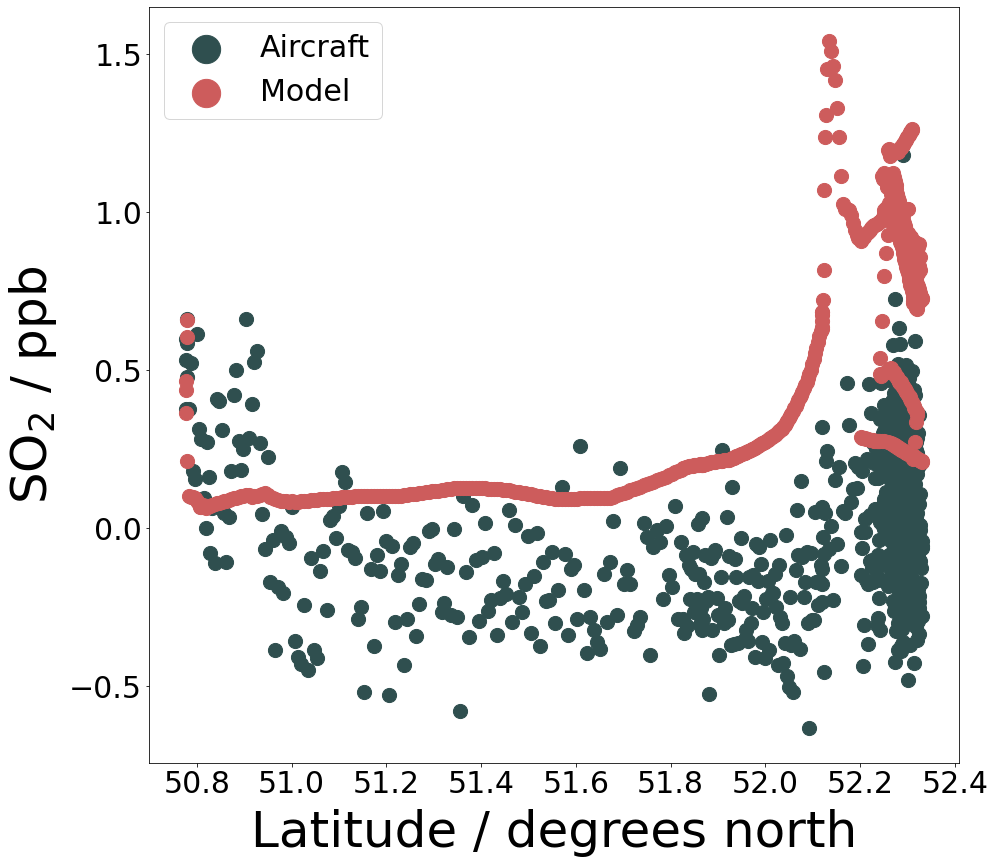

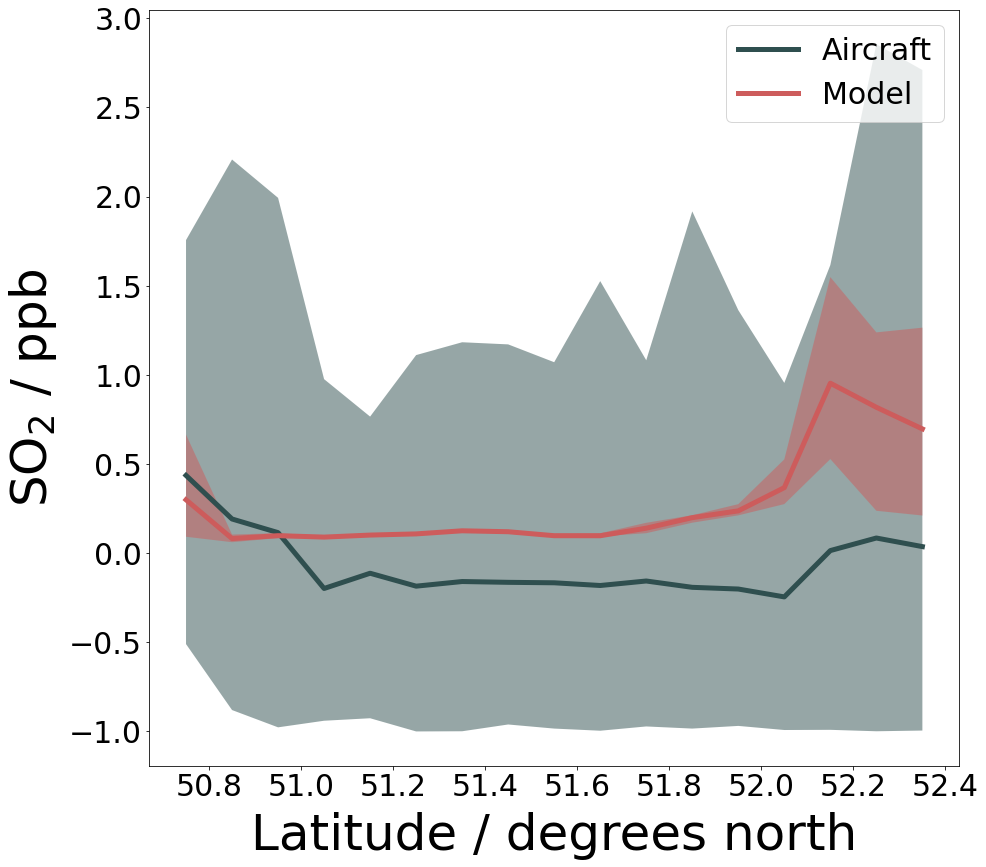

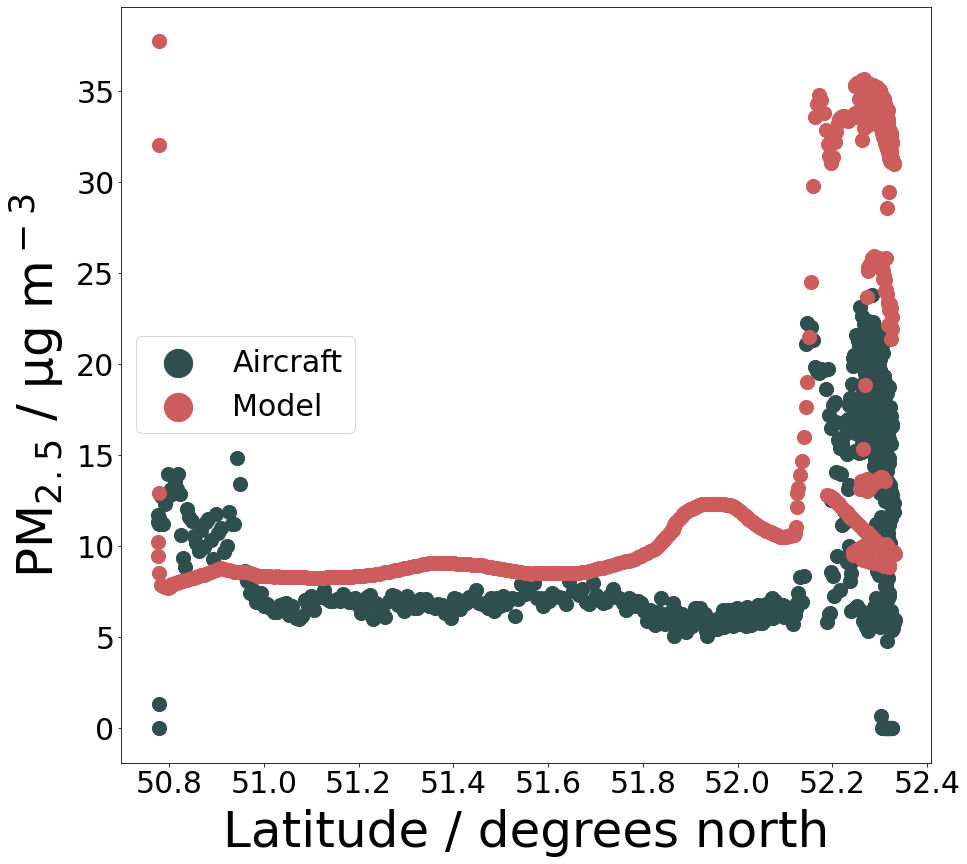

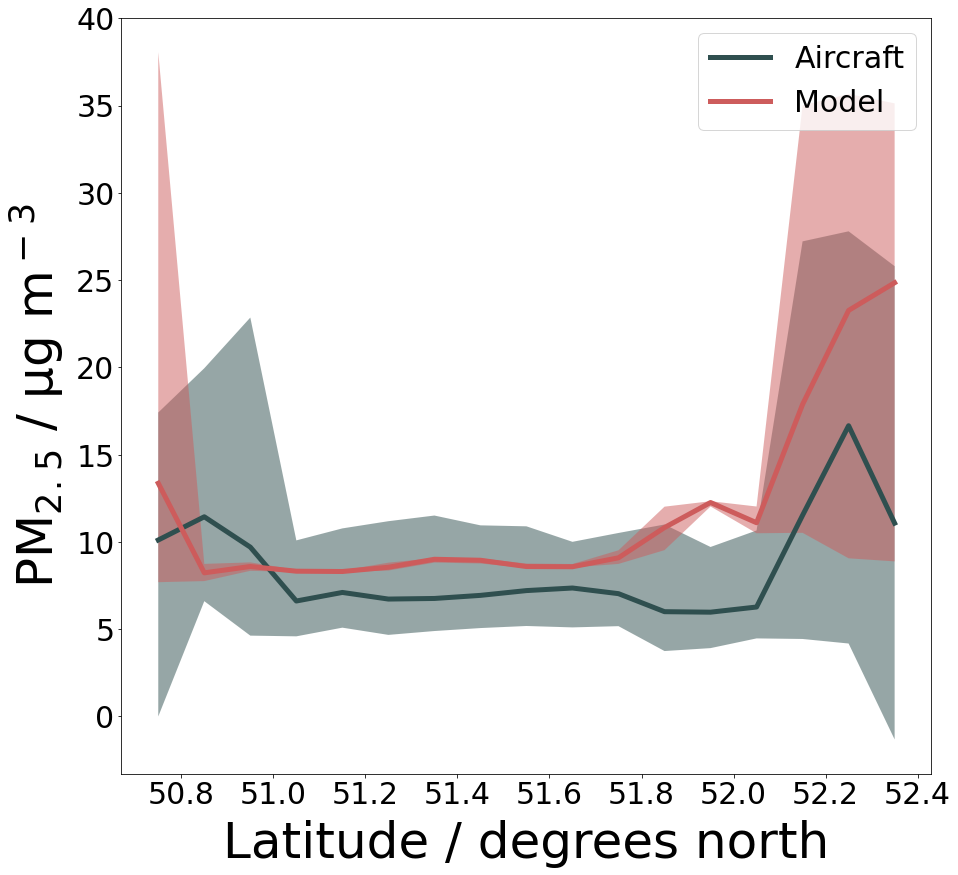

In [4]:
species_dict = pre.species_dictionary()
setup = pre.setup_notebook(flight_number, model)
optns = setup[4]
for key in species_dict.keys() :
    code,label,column_key,unit_conv = species_dict[key]['code'],species_dict[key]['label'],species_dict[key]['column_key'],species_dict[key]['unit_conv']

        # Combine the aircraft and model data.
    df = pre.combine_data(setup,code)

        # Resample the data.
    resample_df = pre.resample_data(df,optns['resample_time'],optns['avg_method'],optns['min_method'],optns['max_method'],model)
    
    plot_latitude_profile(df,resample_df,setup[5],key,label,optns['a_colour'],optns['m_colour'],optns['lat_bin'],optns['avg_method'],optns['min_method'],optns['max_method'], model)